In [761]:

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [762]:

from docutils.nodes import target
from scipy.stats import lognorm
from statsmodels.iolib.summary import summary

import os
from pathlib import Path
from unicodedata import category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import statistics
import pandas as pd
import numpy as np
import functools
from IPython.core.pylabtools import figsize
from matplotlib.lines import lineStyles
from matplotlib.pyplot import xlabel, tight_layout
import os

In [763]:
fontManager.get_font_names()

['Srisakdi',
 'Chalkboard SE',
 'Noto Sans Khojki',
 'Noto Sans Mahajani',
 'Apple Chancery',
 'BIZ UDMincho',
 'DejaVu Sans Mono',
 'Noto Sans Mongolian',
 'Noto Sans New Tai Lue',
 'Wingdings',
 'Noto Sans Limbu',
 'Sama Devanagari',
 'Times',
 'Apple Symbols',
 'Mukta Malar',
 'Noto Sans Modi',
 'Hei',
 'BM Dohyeon',
 'Noto Serif Balinese',
 'Maku',
 'Diwan Kufi',
 'Tiro Devanagari Sanskrit',
 'Krub',
 '.SF Arabic',
 'Arial Unicode MS',
 'Noto Sans Myanmar',
 'Jaini Purva',
 'Noto Sans Syriac',
 'Herculanum',
 'October Tamil',
 'Lantinghei SC',
 'Sinhala Sangam MN',
 'Apple LiGothic',
 'Baloo Bhaina 2',
 'Noto Sans Linear A',
 'STIXSizeOneSym',
 'Noto Sans Carian',
 '.SF Arabic Rounded',
 'Noto Sans Inscriptional Parthian',
 'Bodoni 72 Oldstyle',
 'Georgia',
 'Noto Sans Marchen',
 'cmex10',
 'Noto Sans Hanifi Rohingya',
 'Avenir Next',
 'LingWai SC',
 '.SF Hebrew',
 'Big Caslon',
 'Geneva',
 'Arial Hebrew',
 'Gujarati MT',
 'STIXSizeTwoSym',
 'Kannada Sangam MN',
 'Noto Sans Pahawh 

In [764]:
import matplotlib
from matplotlib.font_manager import fontManager
matplotlib.rc('font',family = ['Times New Roman','Apple LiGothic'])

group_translate = {
    0:'控制組',
    1:'全簡單',
    2:'先易後難',
    3:'先難後易'
}

In [765]:

os.getcwd()
df_question = pd.read_parquet("../data/raw/experiment-2025-q1/ntuecon_experiment_250525/question_structure.parquet")

#conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_book_volume_log.parquet")
df_book_vol = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_book_volume_log_2025-06-03.parquet")

#conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_answer_log.parquet")
df_user_ans = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_user_answer_log_2025-06-03.parquet")

#conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_info.parquet")
df_user_info = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_user_info_2025-06-03.parquet")

df_question = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250525/question_structure.parquet")
df_user_ans_05 = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_answer_log.parquet")
df_user_info_05 = pd.read_parquet(
    '../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_user_answer_log_2025-06-03.parquet')
daily_stat = pd.read_parquet(
    '../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_gc_daily_stat_2025-06-03.parquet')
course = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_gc_course_2025-06-03.parquet")

In [766]:


testdff = pd.read_json("../data/processed/session_data_new.json")
testdff.info()
testdff['is_homo'] = testdff.section_id.apply(lambda x: all(xi == x[0] for xi in x))
testdff.head()


<class 'pandas.core.frame.DataFrame'>
Index: 36032 entries, (-9216223767477519093, -3293706459053707777, 1) to (9223087356083948458, 8730877631531542123, 1)
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               36032 non-null  int64         
 1   gamecharacter_id      36032 non-null  int64         
 2   session_id            36032 non-null  int64         
 3   is_correct            36032 non-null  object        
 4   difficulty_level      36032 non-null  object        
 5   experiment_index      36032 non-null  object        
 6   question_id           36032 non-null  object        
 7   subject_name          36032 non-null  object        
 8   section_id            36032 non-null  object        
 9   section_name          36032 non-null  object        
 10  school_city           36032 non-null  object        
 11  created_at            36032 non-null  object       

,user_id,gamecharacter_id,session_id,is_correct,difficulty_level,experiment_index,question_id,subject_name,section_id,section_name,...,time_diff,created_at_utc8,start_time,end_time,session_length,answer_length,experiment_mode,manual_book_vol_mode,subject_name_mode,is_homo
"(-9216223767477519093, -3293706459053707777, 1)",-9216223767477519093,-3293706459053707777,1,"[0, 0, 1, 0]","[1, 3, 3, 3]","[None, None, None, None]","[941132157500741589, -2528918832815624142, 603...","[數學, 數學, 數學, 數學]","[6084119510007883763, 6084119510007883763, 522...","[4 小數的乘法, 4 小數的乘法, 2 分數的計算, 2 分數的計算]",...,"[None, 19.0, 84.0, 30.0]","[1742298161000, 1742298180000, 1742298264000, ...",2025-03-18 11:42:41,2025-03-18 11:44:54,133,4,NaN,5,數學,False
"(-9215975131138636025, 2806305522055252713, 1)",-9215975131138636025,2806305522055252713,1,"[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5986642740406154097, -1814475752912975980, 57...","[數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數...","[-247801341597882458, -247801341597882458, -24...","[1 體積, 1 體積, 1 體積, 1 體積, 1 體積, 1 體積, 1 體積, 1 體...",...,"[None, 102.0, 55.0, 13.0, 10.0, 16.0, 120.0, 1...","[1744596091000, 1744596193000, 1744596248000, ...",2025-04-14 02:01:31,2025-04-14 02:20:41,1150,35,1.0,5,數學,False
"(-9212166316050044816, 5893252723684985621, 1)",-9212166316050044816,5893252723684985621,1,"[1, 0, 1, 0, 1]","[1, 1, 2, 2, 1]","[None, None, None, None, None]","[-3982380057634078317, 6534779973756457463, -8...","[數學, 數學, 數學, 數學, 數學]","[-5730797827999106544, -1882325247118400549, 7...","[8-1 平行四邊形的面積, 9-1 分數表示整數相除的結果, 10-3 幾分之幾圖, 7-...",...,"[None, 13.0, 58.0, 40.0, 1580.0]","[1744897914000, 1744897927000, 1744897985000, ...",2025-04-17 13:51:54,2025-04-17 14:20:05,1691,5,NaN,5,數學,False
"(-9212166316050044816, 5893252723684985621, 2)",-9212166316050044816,5893252723684985621,2,"[1, 1, 1, 1, 1, 1, 1]","[1, 2, 2, 2, 2, 1, 1]","[3, 3, 3, 3, 3, 3, 3]","[5986642740406154097, -1814475752912975980, 48...","[數學, 數學, 數學, 數學, 數學, 數學, 數學]","[-247801341597882458, -247801341597882458, -24...","[1 體積, 1 體積, 1 體積, 1 體積, 1 體積, 1 體積, 1 體積]",...,"[1940.0, 93.0, 60.0, 93.0, 33.0, 14.0, 41.0]","[1744901545000, 1744901638000, 1744901698000, ...",2025-04-17 14:52:25,2025-04-17 14:57:59,334,7,3.0,5,數學,True
"(-9188432125589223658, -3468651825129845530, 1)",-9188432125589223658,-3468651825129845530,1,"[0, 0]","[2, 1]","[None, None]","[-8645121234103906346, 6775587959579167004]","[數學, 數學]","[1466806251755821696, 1466806251755821696]","[8 分數, 8 分數]",...,"[None, 6.0]","[1744018600000, 1744018606000]",2025-04-07 09:36:40,2025-04-07 09:36:46,6,2,NaN,4,數學,True


In [767]:

# trasform data to seperate different character
long_data = pd.DataFrame()
diff_list = []
corr_list = []
question_list = []
user_id = []
session_id = []
gamecharacter_id = []
section_id = []
experiment_index = []
experiment_mode = []
create_time = []

for idx, row in testdff.iterrows():
    section_set = list(set(row.section_id))
    for sec in section_set:
        section_id.append(sec)
        user_id.append(row.user_id)
        session_id.append(row.session_id)
        gamecharacter_id.append(row.gamecharacter_id)
        experiment_mode.append(row.experiment_mode)
        experiment_index.append([row.experiment_index[idx] for idx, x in enumerate(row.section_id) if x == sec])
        diff_list.append([row.difficulty_level[idx] for idx, x in enumerate(row.section_id) if x == sec])
        corr_list.append([row.is_correct[idx] for idx, x in enumerate(row.section_id) if x == sec])
        question_list.append([row.question_id[idx] for idx, x in enumerate(row.section_id) if x == sec])
        create_time.append([pd.to_datetime(row.created_at_utc8[idx],unit='ms')  for idx, x in enumerate(row.section_id) if x == sec])

long_data['user_id'] = user_id
long_data['session_id'] = session_id
long_data['gamecharacter_id'] = gamecharacter_id
long_data['section_id'] = section_id
long_data['difficulty_level'] = diff_list
long_data['is_correct'] = corr_list
long_data['question_id'] = question_list
long_data['experiment_index'] = experiment_index
long_data['experiment_mode'] = experiment_mode
long_data['create_time'] = create_time



In [768]:
long_data['experiment_mode'] = long_data['experiment_mode'].fillna(-1)
long_data.value_counts('experiment_mode')


experiment_mode
-1.0    53918
 1.0     7987
 0.0     7878
 2.0     7313
 3.0     6727
Name: count, dtype: int64

In [769]:


long_data['q_len'] = long_data.is_correct.apply(lambda x: len(x))
long_data = long_data.query('session_id == 1')
long_data['experiment_mode'] = long_data['experiment_mode'].fillna(-1)
long_data.groupby('experiment_mode').describe()
long_data['create_at'] = long_data.create_time.apply(lambda x : x[0])
#long_data = long_data.query('create_at >= "2025-04-08"')

rawdata = long_data.copy()
rawdata.value_counts('experiment_mode')

experiment_mode
-1.0    5390
 1.0     855
 2.0     848
 0.0     826
 3.0     771
Name: count, dtype: int64

In [770]:

long_data = long_data.query('q_len >= 12')

In [771]:
rawdata.value_counts('experiment_mode')

experiment_mode
-1.0    5390
 1.0     855
 2.0     848
 0.0     826
 3.0     771
Name: count, dtype: int64

In [772]:
long_data.value_counts('experiment_mode')

experiment_mode
-1.0    701
 0.0    259
 2.0    259
 1.0    248
 3.0    243
Name: count, dtype: int64

In [773]:
long_data

,user_id,session_id,gamecharacter_id,section_id,difficulty_level,is_correct,question_id,experiment_index,experiment_mode,create_time,q_len,create_at
2,-9215975131138636025,1,2806305522055252713,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202...",12,2025-04-14 02:15:35
4,-9215975131138636025,1,2806305522055252713,145845299402454255,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]","[69113588992878618, -75308616834142435, -23488...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:11:22, 2025-04-14 02:11:51, 202...",12,2025-04-14 02:11:22
43,-9167949940408139786,1,4032858197546372387,6084119510007883763,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-5859345889434173077, 4977986320726250473, -2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-29 19:16:52, 2025-04-29 19:18:06, 202...",12,2025-04-29 19:16:52
44,-9167949940408139786,1,4032858197546372387,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-29 18:55:30, 2025-04-29 18:56:22, 202...",12,2025-04-29 18:55:30
51,-9163758667723015136,1,-685974647409257383,796364780135205330,"[2, 2, 1, 3, 2, 3, 3, 3, 1, 2, 1, 1, 2, 2, 3, ...","[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, ...","[-5645115068493998834, 7471261903785587311, 91...","[None, None, None, None, None, None, None, Non...",-1.0,"[2025-02-12 08:49:28, 2025-02-12 08:49:53, 202...",17,2025-02-12 08:49:28
...,...,...,...,...,...,...,...,...,...,...,...,...
83737,9191805119663162572,1,-25535851136541842,-247801341597882458,"[1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1]","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]","[5986642740406154097, -1814475752912975980, 57...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",2.0,"[2025-04-15 09:02:20, 2025-04-15 09:02:39, 202...",13,2025-04-15 09:02:20
83784,9207202658248594289,1,5273085726168325162,5223737939809232457,"[1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2]","[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]","[-5603406397637757092, -2881749990646977859, 3...","[None, None, None, None, None, None, None, Non...",-1.0,"[2025-03-09 11:31:04, 2025-03-09 11:31:40, 202...",12,2025-03-09 11:31:04
83785,9207202658248594289,1,5273085726168325162,-247801341597882458,"[3, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, ...","[-3772869253171254520, -3286862775113972652, -...","[None, None, None, None, None, None, None, Non...",-1.0,"[2025-03-09 11:33:07, 2025-03-09 11:33:46, 202...",19,2025-03-09 11:33:07
83789,9219658531437984765,1,-4405050303537733295,-247801341597882458,"[1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-5406777392837291699, -3286862775113972652, -...","[None, None, None, None, None, None, None, Non...",-1.0,"[2025-02-25 16:37:04, 2025-02-25 16:37:30, 202...",26,2025-02-25 16:37:04


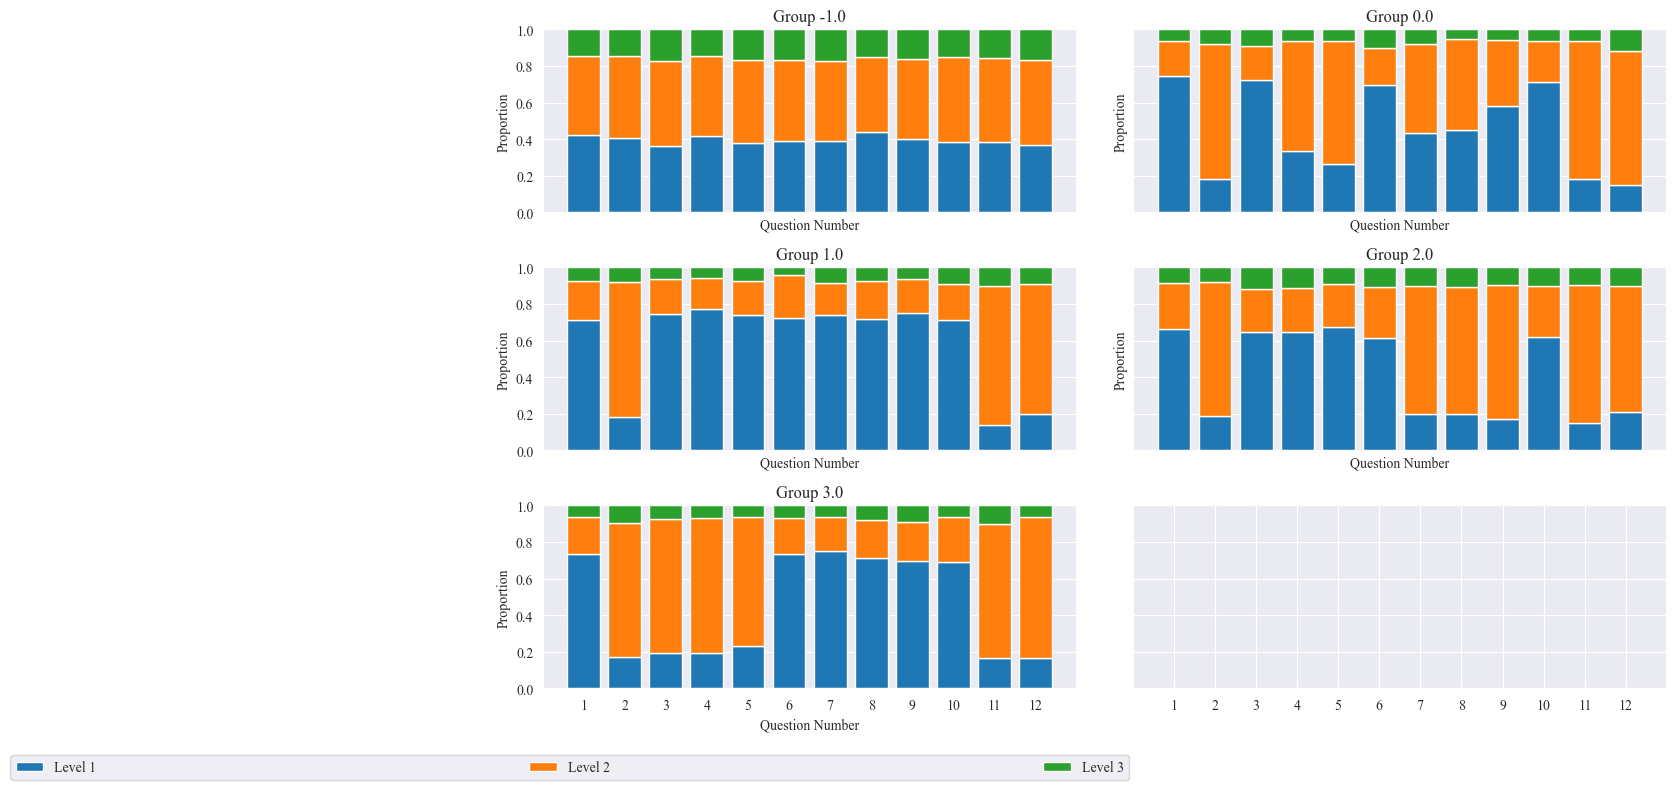

In [774]:



def difficulty_proportions(series_lists, levels=(1, 2, 3), n_questions=12):
    """
    series_lists: pandas Series，每個元素是一個 difficulty_level 的 list
    回傳：一個 dict，key 為難度等級，value 為長度 n_questions 的比例陣列
    """
    # 建立矩陣 (num_samples, n_questions)
    matrix = np.array([lst[:n_questions] for lst in series_lists], dtype=float)
    # 每題非 nan 的樣本數
    valid_counts = np.sum(~np.isnan(matrix), axis=0)
    props = {}
    for lvl in levels:
        # 計算該等級出現次數，再除以 valid_counts
        props[lvl] = np.sum(matrix == lvl, axis=0) / valid_counts
    return props


# 1. 計算每組的難度分佈比例
grouped = long_data.groupby('experiment_mode')['difficulty_level']
diff_props = {
    mode: difficulty_proportions(series)
    for mode, series in grouped
}

# 2. 畫圖：3x2 子圖，每組一張堆疊長條圖
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.flatten()
x = np.arange(1, 13)  # 題號 1–12
levels = (1, 2, 3)

for i, (mode, props) in enumerate(diff_props.items()):
    ax = axs[i]
    bottom = np.zeros_like(x, dtype=float)
    for lvl in levels:
        ax.bar(x, props[lvl], bottom=bottom, label=f'Level {lvl}')
        bottom += props[lvl]
    ax.set_title(f'Group {mode}')
    ax.set_xticks(x)
    ax.set_xlabel('Question Number')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
    ax.grid(True)

# 第 1 個子圖加圖例


ax.legend(bbox_to_anchor=(-1, -0.5, 2.1, 2), loc='lower right', ncol=3, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.show()

In [775]:

for qid in range(12):
    long_data[f'q_{qid + 1}'] = long_data['question_id'].apply(lambda x: x[qid])
    long_data[f'q_{qid + 1}_corr'] = long_data['is_correct'].apply(lambda x: x[qid])

for i in [-1, 0, 1, 2, 3]:
    for qid in range(12):
        print(long_data[long_data['experiment_mode'] == i][f'q_{qid + 1}'].mode(dropna=True))
        long_data[f'q_{qid + 1}_mode'] = long_data[long_data['experiment_mode'] == i][f'q_{qid + 1}'].mode(dropna=True)[
            0]

long_data['all_mode'] = True

for qid in [0, 1, 5, 9, 10, 11]:
    mask = long_data[f'q_{qid + 1}'] == long_data[f'q_{qid + 1}_mode']
    long_data['all_mode'] &= mask

pd.crosstab(long_data['all_mode'], long_data['experiment_mode'])

long_data.info()

0   -5406777392837291699
1   -3772869253171254520
2   -3286862775113972652
Name: q_1, dtype: int64
0   -9013829383219240211
1    5786121490234329394
Name: q_2, dtype: int64
0   -3286862775113972652
Name: q_3, dtype: int64
0    5556066601331488933
Name: q_4, dtype: int64
0   -5263639425820740356
1   -1897899015581030178
Name: q_5, dtype: int64
0    4368775010054587344
Name: q_6, dtype: int64
0    4816520945223989067
Name: q_7, dtype: int64
0   -1783125651226257124
Name: q_8, dtype: int64
0   -9013829383219240211
1    4991778149722867127
2    7246391716930387719
Name: q_9, dtype: int64
0   -1025311054463154271
1    5786121490234329394
Name: q_10, dtype: int64
0    831253084160088526
Name: q_11, dtype: int64
0    5556066601331488933
Name: q_12, dtype: int64
0    5986642740406154097
Name: q_1, dtype: int64
0   -1814475752912975980
Name: q_2, dtype: int64
0    5786121490234329394
Name: q_3, dtype: int64
0   -1025311054463154271
Name: q_4, dtype: int64
0    7479955377401805758
Name: q_5, dty

In [776]:
# did analyze on q1 to q10 and q2 to q11, q12
import statsmodels.formula as fml
import statsmodels.formula.api as smf


def did_analyze(df: pd.DataFrame, baseline: int, target: list):
    recode_dict = {f'q_{target[0]}_corr': 0, f'q_{target[1]}_corr': 1}
    df = df.melt(id_vars=['user_id', 'section_id', 'experiment_mode'],
                 value_vars=[f'q_{target[0]}_corr', f'q_{target[1]}_corr'],
                 var_name='time_binary',
                 value_name='corr'
                 )
    df['time_binary'] = df['time_binary'].apply(lambda x: recode_dict[x])
    formula = (
        f'corr ~ time_binary * '
        f'C(experiment_mode, Treatment(reference={baseline}))'
    )
    model = smf.ols(formula, data=df).fit()
    print(model.summary())

    return model


model = did_analyze(long_data.query('all_mode == True'), baseline=1, target=[1, 10])


                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.786
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           0.000553
Time:                        18:05:31   Log-Likelihood:                 12.002
No. Observations:                 382   AIC:                            -8.004
Df Residuals:                     374   BIC:                             23.56
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

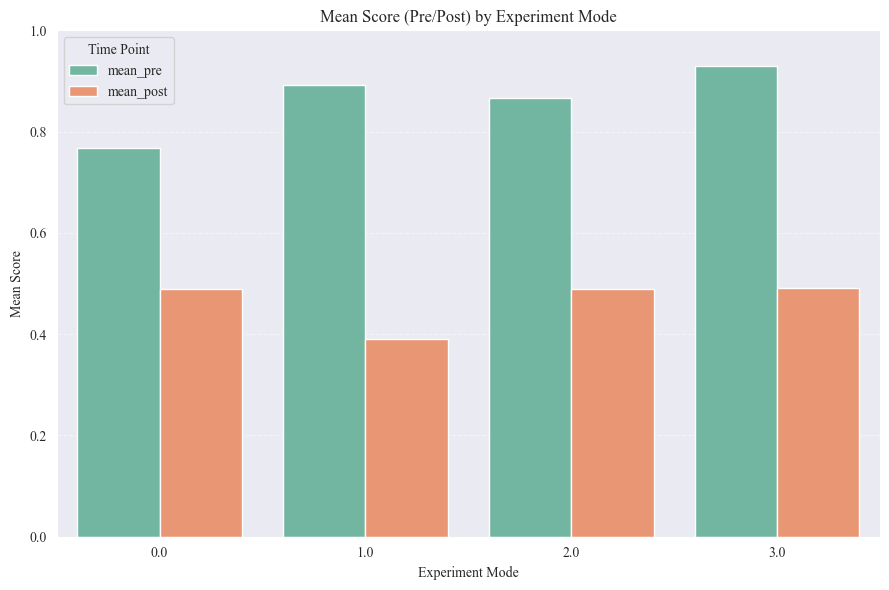

In [777]:

target = [3, 11]
summary_df = (
    long_data.query('all_mode == True')
    .groupby('experiment_mode')
    .agg(
        mean_pre=(f'q_{target[0]}_corr', 'mean'),
        mean_post=(f'q_{target[1]}_corr', 'mean'),
        std_pre=(f'q_{target[0]}_corr', 'std'),
        std_post=(f'q_{target[1]}_corr', 'std')
    )
    .reset_index()
)

df_plot = summary_df.melt(
    id_vars='experiment_mode',
    value_vars=['mean_pre', 'mean_post'],
    var_name='time_point',
    value_name='mean_score'
)

# 畫 grouped bar chart
plt.figure(figsize=(9, 6))

# 畫圖時以 experiment_mode 為 x 軸，time_point 為 hue（也就是 pre/post）
import seaborn as sns

sns.barplot(
    data=df_plot,
    x='experiment_mode',
    y='mean_score',
    hue='time_point',
    palette='Set2'
)

plt.title("Mean Score (Pre/Post) by Experiment Mode")
plt.xlabel("Experiment Mode")
plt.ylabel("Mean Score")
plt.ylim(0, 1)  # 根據你的 mean 值調整
plt.legend(title='Time Point')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [778]:
# import control sequences

control_seqs = pd.read_csv('../data/raw/question_sequence.csv')

recode_dict = {
    'control':0,
    'treatment1':1,
    'treatment2':2,
    'treatment3':3,
    }

section_dict = dict(zip(df_question.section_name,df_question.section_id))
rev_section_dict = dict(zip(df_question.section_id,df_question.section_name))

control_seqs['section_id'] = control_seqs.section_name_113_2.map(section_dict)
control_seqs['experiment_mode'] = control_seqs.sequence.map(recode_dict)
control_seqs['search_key'] = control_seqs.apply(lambda row: str(row['section_id'])+'_'+ str(row['experiment_mode']),axis = 1)
control_seqs['control_seq'] = control_seqs.apply(lambda row:np.array([row[f'Q{i+1}'] for i in range(12)]),axis = 1)


In [779]:
control_seqs.head()

,Unnamed: 0,sequence,publisher,section_name,book_volume_name,publisher_name_113_2,section_name_113_2,book_volume_name_113_2,Q1,Q2,...,Q7,Q8,Q9,Q10,Q11,Q12,section_id,experiment_mode,search_key,control_seq
0,0,control,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-1908360932417219092,-2348804092072956357,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,0,-3545039493898610459_0,"[69113588992878618, -75308616834142435, -53711..."
1,1,treatment1,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,4334620487126035177,5108527915460688310,-1288720951380365417,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,1,-3545039493898610459_1,"[69113588992878618, -75308616834142435, -23488..."
2,2,treatment2,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-3202230148646485972,-1908360932417219092,-8594155001789108421,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,2,-3545039493898610459_2,"[69113588992878618, -75308616834142435, -23488..."
3,3,treatment3,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-2348804092072956357,-5371107019222777434,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,3,-3545039493898610459_3,"[69113588992878618, -75308616834142435, -32022..."
4,0,control,康軒國小,9 時間的乘除,五下112,康軒國小,9 時間的乘除,五下113,520497830035904533,-2091250926218676150,...,-2307309825203258326,-4398838213214723618,4054464459422027015,2596504183669148612,3305360628776648069,-2670908083034426001,-3525338262485141936,0,-3525338262485141936_0,"[520497830035904533, -2091250926218676150, 174..."


In [780]:
experiment_data = long_data.query('experiment_mode != -1')
experiment_data.loc[:,'12_question_id'] = experiment_data['question_id'].apply(lambda x : x[:12])
experiment_data.loc[:,'search_key'] = experiment_data.apply(lambda row: str(row['section_id'])+'_'+ str(int(row['experiment_mode'])),axis = 1)

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/874510696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data.loc[:,'12_question_id'] = experiment_data['question_id'].apply(lambda x : x[:12])
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/874510696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data.loc[:,'search_key'] = experiment_data.apply(lambda row: str(row['section_id'])+'_'+ str(int(row['experiment_mode'])),axis = 1)


In [781]:

seq_dict = dict(zip(control_seqs.search_key,control_seqs.control_seq))



experiment_data['seq_valid'] = experiment_data.apply(lambda row:
                                                     np.array_equal(row['12_question_id'],seq_dict.get(row['search_key'])),axis = 1)
experiment_data['control_seq'] = experiment_data['search_key'].apply(lambda  skey:seq_dict.get(skey))


/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/2871953063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data['seq_valid'] = experiment_data.apply(lambda row:
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/2871953063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data['control_seq'] = experiment_data['search_key'].apply(lambda  skey:seq_dict.get(skey))


In [782]:
experiment_data.create_time.apply(lambda x: x[0]).max()

Timestamp('2025-06-03 14:09:46')

In [783]:
rawdata

,user_id,session_id,gamecharacter_id,section_id,difficulty_level,is_correct,question_id,experiment_index,experiment_mode,create_time,q_len,create_at
0,-9216223767477519093,1,-3293706459053707777,5223737939809232457,"[3, 3]","[1, 0]","[603844519309736809, 6790652223673883887]","[None, None]",-1.0,"[2025-03-18 11:44:24, 2025-03-18 11:44:54]",2,2025-03-18 11:44:24
1,-9216223767477519093,1,-3293706459053707777,6084119510007883763,"[1, 3]","[0, 0]","[941132157500741589, -2528918832815624142]","[None, None]",-1.0,"[2025-03-18 11:42:41, 2025-03-18 11:43:00]",2,2025-03-18 11:42:41
2,-9215975131138636025,1,2806305522055252713,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202...",12,2025-04-14 02:15:35
3,-9215975131138636025,1,2806305522055252713,-247801341597882458,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0]","[5986642740406154097, -1814475752912975980, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:01:31, 2025-04-14 02:03:13, 202...",11,2025-04-14 02:01:31
4,-9215975131138636025,1,2806305522055252713,145845299402454255,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]","[69113588992878618, -75308616834142435, -23488...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:11:22, 2025-04-14 02:11:51, 202...",12,2025-04-14 02:11:22
...,...,...,...,...,...,...,...,...,...,...,...,...
83807,9220452508174186299,1,-7188733719598119482,7014419182961473862,"[2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1]","[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]","[8706153377644136661, 3983685357014293487, -66...","[None, None, None, None, None, None, None, Non...",-1.0,"[2025-02-23 17:59:51, 2025-02-23 18:00:47, 202...",16,2025-02-23 17:59:51
83808,9220452508174186299,1,-7188733719598119482,-5575277271154697322,"[1, 1, 2, 1, 1, 2, 2, 1, 2]","[1, 0, 1, 0, 0, 1, 1, 0, 0]","[5760313997252286119, -1159854048413575159, 72...","[None, None, None, None, None, None, None, Non...",-1.0,"[2025-02-23 17:44:20, 2025-02-23 17:44:41, 202...",9,2025-02-23 17:44:20
83809,9220452508174186299,1,-7188733719598119482,2648017646669948988,"[2, 2, 1, 1, 2]","[0, 0, 0, 1, 0]","[9109558805351854, -9018791814414152491, 44969...","[None, None, None, None, None]",-1.0,"[2025-02-23 17:53:26, 2025-02-23 17:53:42, 202...",5,2025-02-23 17:53:26
83821,9223087356083948458,1,8730877631531542123,6084119510007883763,"[1, 2, 3, 1, 1, 2, 1]","[1, 0, 0, 0, 1, 0, 1]","[-2451827522348391739, -7175100385077046464, 2...","[2, 2, 2, 2, 2, 2, 2]",2.0,"[2025-05-29 13:53:54, 2025-05-29 13:55:54, 202...",7,2025-05-29 13:53:54


In [784]:
# make new df
raw_experiment_data = rawdata.query('experiment_mode != -1')
raw_experiment_data.loc[:, '12_question_id'] = raw_experiment_data['question_id'].apply(lambda x: x[:12])
raw_experiment_data.loc[:, 'search_key'] = raw_experiment_data.apply(
    lambda row: str(row['section_id']) + '_' + str(int(row['experiment_mode'])), axis=1)

seq_dict = dict(zip(control_seqs.search_key, control_seqs.control_seq))

raw_experiment_data['seq_valid'] = raw_experiment_data.apply(lambda row:
                                                     np.array_equal(row['12_question_id'],
                                                                    seq_dict.get(row['search_key'])), axis=1)
raw_experiment_data['control_seq'] = raw_experiment_data['search_key'].apply(lambda skey: seq_dict.get(skey))

for qid in range(12):
    raw_experiment_data[f'q_{qid + 1}'] = raw_experiment_data['question_id'].apply(lambda x: x[qid] if qid < len(x) else None)
    raw_experiment_data[f'q_{qid + 1}_corr'] = raw_experiment_data['is_correct'].apply(lambda x: x[qid] if qid < len(x) else None)


def is_equal(l_lis,r_lis,q_len):
    if r_lis is None:
        return False
    itern = min(len(l_lis),q_len)
    for i in range(itern):
        if l_lis[i] != r_lis[i]:
            return False
    return True
for i in range(1,13):
    raw_experiment_data[f'seq_valid_less{i}inc'] = raw_experiment_data.apply(lambda row: is_equal(row['12_question_id'],row['control_seq'],i) ,axis = 1)

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/151151534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_experiment_data.loc[:, '12_question_id'] = raw_experiment_data['question_id'].apply(lambda x: x[:12])
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/151151534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_experiment_data.loc[:, 'search_key'] = raw_experiment_data.apply(
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/151151534.py:9: S

Text(0.5, 0, 'Question NO.')

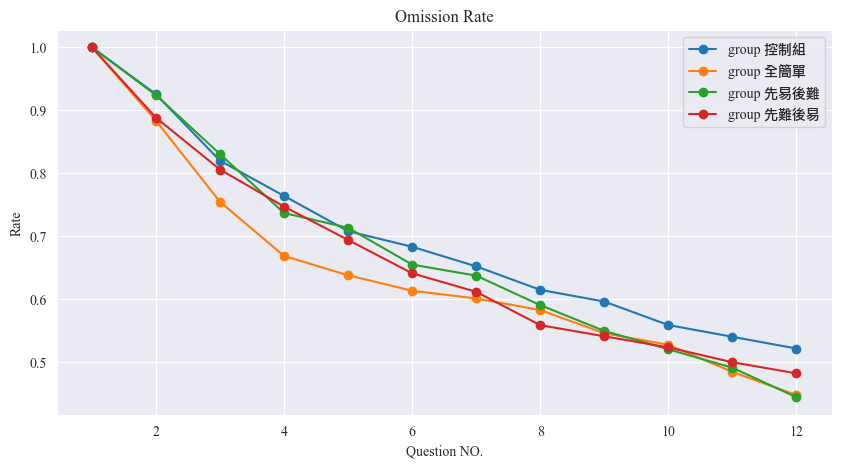

In [785]:
raw_experiment_data_f12corr = raw_experiment_data.query('seq_valid_less12inc == True')
plt.figure(figsize=(10,5))
for g in [0,1,2,3]:
    plt.plot([i+1 for i in range(12)],[len(raw_experiment_data_f12corr.query(f'q_len >= {i+1} and experiment_mode == {g}').index)/len(raw_experiment_data_f12corr.query(f'experiment_mode == {g}').index) for i in range(12)],label = f'group {group_translate[g]}',marker = 'o')
plt.legend()
plt.title('Omission Rate')
plt.ylabel('Rate')
plt.xlabel('Question NO.')

In [786]:
valid_experiment_data = experiment_data.query('seq_valid == True')


In [787]:
valid_experiment_data.value_counts('experiment_mode')

experiment_mode
0.0    84
3.0    82
2.0    76
1.0    73
Name: count, dtype: int64

# make stack bar plot

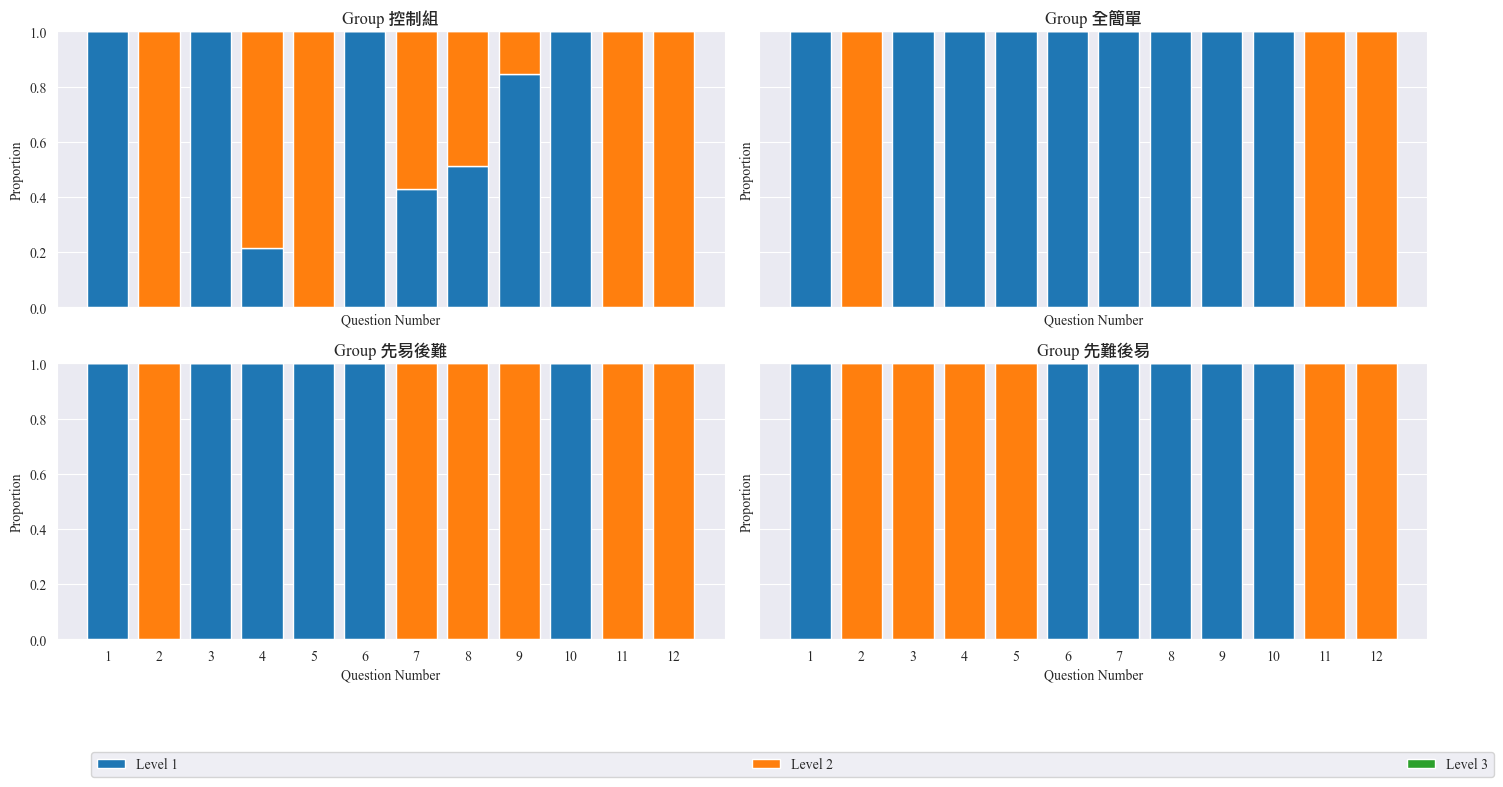

In [788]:
# 1. 計算每組的難度分佈比例
grouped = valid_experiment_data.groupby('experiment_mode')['difficulty_level']
diff_props = {
    mode: difficulty_proportions(series)
    for mode, series in grouped
}

# 2. 畫圖：3x2 子圖，每組一張堆疊長條圖
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=True)
axs = axs.flatten()
x = np.arange(1, 13)  # 題號 1–12
levels = (1, 2, 3)

for i, (mode, props) in enumerate(diff_props.items()):
    ax = axs[i]
    bottom = np.zeros_like(x, dtype=float)
    for lvl in levels:
        ax.bar(x, props[lvl], bottom=bottom, label=f'Level {lvl}')
        bottom += props[lvl]
    ax.set_title(f'Group {group_translate[mode]}')
    ax.set_xticks(x)
    ax.set_xlabel('Question Number')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
    ax.grid(True)

plt.legend(bbox_to_anchor=(-1, -0.5, 2.1, 2), loc='lower right', ncol=3, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.show()

# DID

In [789]:
# make long data to do did
valid_experiment_data_no0 = valid_experiment_data.query('experiment_mode != 0')
print('_________________________________________ q1 q10_________________________________________ \n')
did_1_10 = did_analyze(valid_experiment_data_no0,baseline=1,target=[1,10])
print('_________________________________________ q2 q11_________________________________________  \n')
did_2_11 = did_analyze(valid_experiment_data_no0,baseline=1,target=[2,11])
print('_________________________________________ q2 q12_________________________________________  \n')
did_2_12 = did_analyze(valid_experiment_data_no0,baseline=1,target=[2,12])


_________________________________________ q1 q10_________________________________________ 

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.095
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.362
Time:                        18:05:35   Log-Likelihood:                -120.63
No. Observations:                 462   AIC:                             253.3
Df Residuals:                     456   BIC:                             278.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025 

In [790]:
# q12 correct rate

def correct_rate_analyze(df: pd.DataFrame, baseline: int, target: int):
    df = df.melt(id_vars=['user_id', 'section_id', 'experiment_mode'],
                 value_vars=[f'q_{target}_corr'],
                 var_name='time_binary',
                 value_name='corr'
                 )
    formula = (
        f'corr ~ C(experiment_mode, Treatment(reference={baseline}))'
    )
    model = smf.ols(formula, data=df).fit()
    print(model.summary())
    return model


print('_________________________________________ q1_________________________________________  \n')
corr_1 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=1)
print('_________________________________________ q2_________________________________________  \n')
corr_2 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=2)
print('_________________________________________ q10_________________________________________  \n')
corr_10 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=10)
print('_________________________________________ q11_________________________________________  \n')
corr_11 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=11)
print('_________________________________________ q12_________________________________________  \n')
corr_12 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=12)



_________________________________________ q1_________________________________________  

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2256
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.798
Time:                        18:05:35   Log-Likelihood:                -34.495
No. Observations:                 231   AIC:                             74.99
Df Residuals:                     228   BIC:                             85.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---

In [791]:
for i in [10,11,12]:
    print(f"----------------------------q {i}-------------------------------")
    formula = (f'q_{i}_corr ~ C(experiment_mode, Treatment(reference=1)) + q_1_corr + q_2_corr ')
    model = smf.ols(formula, data=valid_experiment_data_no0).fit()
    print(model.summary())

----------------------------q 10-------------------------------
                            OLS Regression Results                            
Dep. Variable:              q_10_corr   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.464
Date:                Wed, 13 Aug 2025   Prob (F-statistic):            0.00905
Time:                        18:05:35   Log-Likelihood:                -75.374
No. Observations:                 231   AIC:                             160.7
Df Residuals:                     226   BIC:                             178.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [792]:
print('_________________________________________ q1_________________________________________  \n')
corr_1 = correct_rate_analyze(raw_experiment_data_f12corr,baseline=1,target=1)
print('_________________________________________ q2_________________________________________  \n')
corr_2 = correct_rate_analyze(raw_experiment_data_f12corr,baseline=1,target=2)

_________________________________________ q1_________________________________________  

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.464
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.223
Time:                        18:05:35   Log-Likelihood:                -254.49
No. Observations:                 665   AIC:                             517.0
Df Residuals:                     661   BIC:                             535.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---

In [793]:
valid_experiment_data_no0_merge23 = valid_experiment_data.query('experiment_mode != 0')
valid_experiment_data_no0_merge23['experiment_mode'] = valid_experiment_data_no0_merge23['experiment_mode'].apply(lambda x : 0 if x == 1 else 1)
print('_________________________________________ q1 q10_________________________________________ \n')
did_1_10 = did_analyze(valid_experiment_data_no0_merge23,baseline=0,target=[1,10])
print('_________________________________________ q2 q11_________________________________________  \n')
did_2_11 = did_analyze(valid_experiment_data_no0_merge23,baseline=0,target=[2,11])
print('_________________________________________ q2 q12_________________________________________  \n')
did_2_12 = did_analyze(valid_experiment_data_no0_merge23,baseline=0,target=[2,12])

_________________________________________ q1 q10_________________________________________ 

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.718
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.162
Time:                        18:05:35   Log-Likelihood:                -120.80
No. Observations:                 462   AIC:                             249.6
Df Residuals:                     458   BIC:                             266.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025   

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/321654591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_experiment_data_no0_merge23['experiment_mode'] = valid_experiment_data_no0_merge23['experiment_mode'].apply(lambda x : 0 if x == 1 else 1)


In [794]:
print('_________________________________________ q1_________________________________________  \n')
corr_1 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=1)
print('_________________________________________ q2_________________________________________  \n')
corr_2 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=2)
print('_________________________________________ q10_________________________________________  \n')
corr_10 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=10)
print('_________________________________________ q11_________________________________________  \n')
corr_11 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=11)
print('_________________________________________ q12_________________________________________  \n')
corr_12 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=12)

_________________________________________ q1_________________________________________  

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4385
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.509
Time:                        18:05:35   Log-Likelihood:                -34.502
No. Observations:                 231   AIC:                             73.00
Df Residuals:                     229   BIC:                             79.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----

# engagement analyze

In [795]:
# pre-experiment correct rate data
question_correct_rate = df_user_ans.groupby('question_id').agg({
    'is_correct':['mean','count']

})
question_correct_rate.head()

is_correct      
                           mean count
question_id                          
-9223361055765457616       0.75     4
-9223292678947070792        1.0     2
-9223243849218151857        1.0     3
-9223242614800200375        1.0     1
-9223221247853814224        1.0     2

In [796]:
valid_experiment_data

,user_id,session_id,gamecharacter_id,section_id,difficulty_level,is_correct,question_id,experiment_index,experiment_mode,create_time,...,q_8_mode,q_9_mode,q_10_mode,q_11_mode,q_12_mode,all_mode,12_question_id,search_key,seq_valid,control_seq
2,-9215975131138636025,1,2806305522055252713,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,False,"[4680614589130178593, -1794677401750382001, -1...",-9042528178512436726_1,True,"[4680614589130178593, -1794677401750382001, -1..."
44,-9167949940408139786,1,4032858197546372387,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-29 18:55:30, 2025-04-29 18:56:22, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,False,"[4680614589130178593, -1794677401750382001, -1...",-9042528178512436726_1,True,"[4680614589130178593, -1794677401750382001, -1..."
74,-9158103991383553355,1,7471321155863990421,-247801341597882458,"[1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[5986642740406154097, -1814475752912975980, 57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[2025-04-15 21:23:24, 2025-04-15 21:23:59, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 57...",-247801341597882458_0,True,"[5986642740406154097, -1814475752912975980, 57..."
564,-9018119489352649734,1,-3547333037196284375,-247801341597882458,"[1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 2, ...","[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, ...","[5986642740406154097, -1814475752912975980, 57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,"[2025-04-10 20:46:04, 2025-04-10 20:46:34, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 57...",-247801341597882458_0,True,"[5986642740406154097, -1814475752912975980, 57..."
580,-8998572465591804129,1,-3539411093230452719,-247801341597882458,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[5986642740406154097, -1814475752912975980, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-17 18:31:45, 2025-04-17 18:32:28, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 57...",-247801341597882458_1,True,"[5986642740406154097, -1814475752912975980, 57..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81824,8918564285805964943,1,-2337784458889706359,-724883818906726236,"[1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2]","[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]","[4594576974770320568, 5214900591100106728, -16...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",2.0,"[2025-05-15 10:03:32, 2025-05-15 10:03:51, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,False,"[4594576974770320568, 5214900591100106728, -16...",-724883818906726236_2,True,"[4594576974770320568, 5214900591100106728, -16..."
81838,8953291955092622586,1,4976729390234959504,-3986686354055251492,"[1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 3, 1]","[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]","[-8965973984069043919, -766303834734867880, -6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[2025-05-29 13:32:12, 2025-05-29 13:32:20, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-526363942582074035

In [797]:
#valid_experiment_data['delta_time'] = valid_experiment_data['create_time'].apply(lambda lis : [(lis[i+1] - lis[i])for i in range(lis)])
valid_experiment_data.loc[:,'delta_time'] = valid_experiment_data.loc[:,'create_time'].apply(lambda lis : [(lis[i+1] - lis[i]).total_seconds() for i in range(len(lis)-1)])
valid_experiment_data.loc[:,'accumulate_time'] = valid_experiment_data.loc[:,'create_time'].apply(lambda lis : [(lis[i+1] - lis[0]).total_seconds() for i in range(len(lis)-1)])

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/1320826900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_experiment_data.loc[:,'delta_time'] = valid_experiment_data.loc[:,'create_time'].apply(lambda lis : [(lis[i+1] - lis[i]).total_seconds() for i in range(len(lis)-1)])
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/1320826900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_experiment_data.loc[:,'accumulate_time'] = valid_experiment_data.loc[:,'create

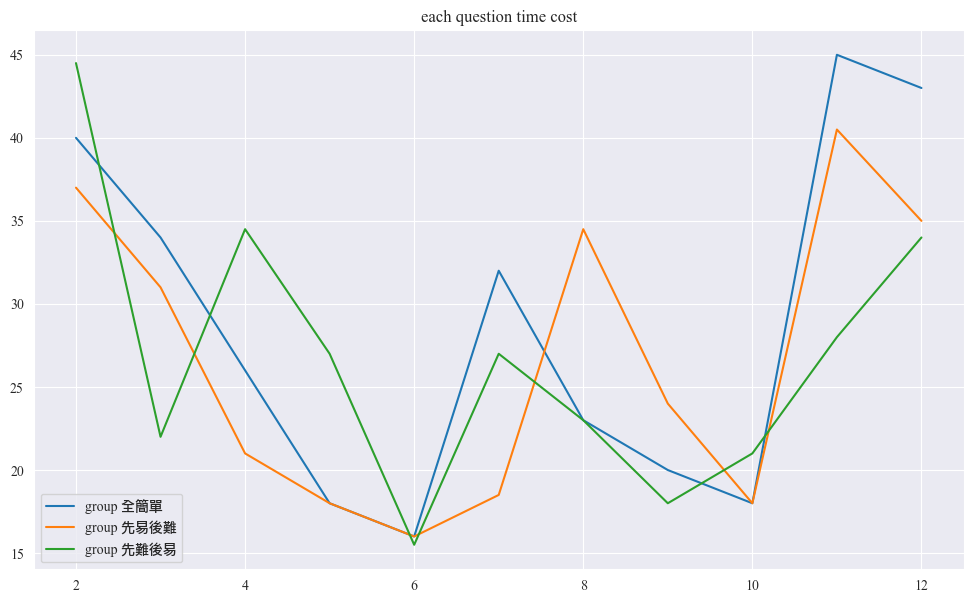

In [798]:
def anstime_analyze(df:pd.DataFrame,groups:list,q_len,col:str):
    results = []
    for group in groups:
        temp = []
        df_g = df.query(f'experiment_mode == {group}')
        matrix = df_g[f'{col}'].values
        for li in matrix:
            temp.append(li[:11])
        results.append(np.nanmedian(temp,axis = 0))
    return results

qtime = anstime_analyze(valid_experiment_data,groups = [0,1,2,3],col = 'delta_time',q_len=12)
# plot results

plt.figure(figsize=(12,7))
for g,lis in zip([1,2,3],qtime[1:4]):
    plt.plot([i+2 for i in range(11)],lis,label = f'group {group_translate[g]}')
plt.title('each question time cost')
plt.legend()



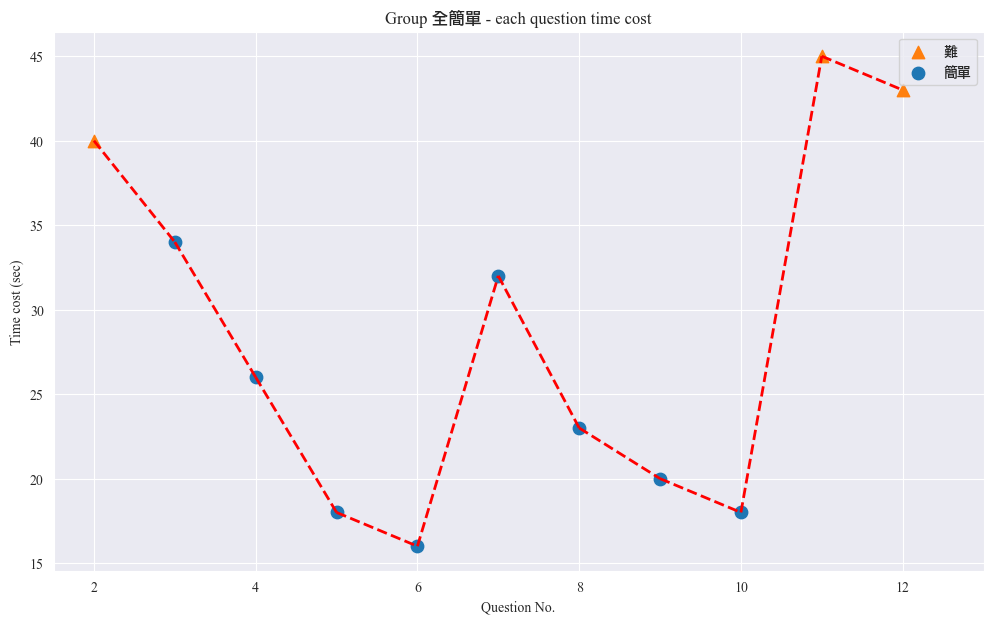

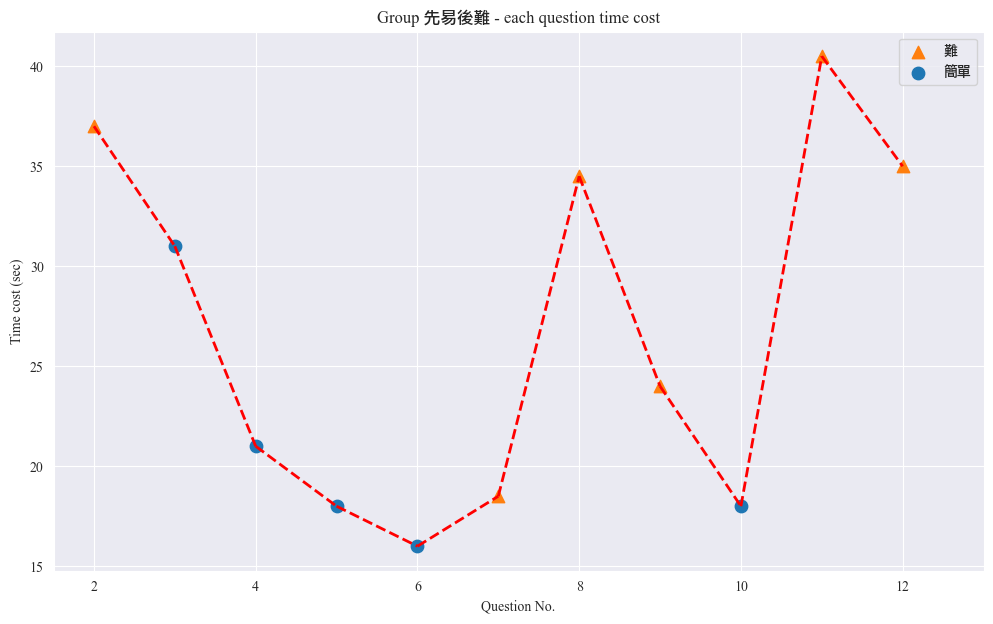

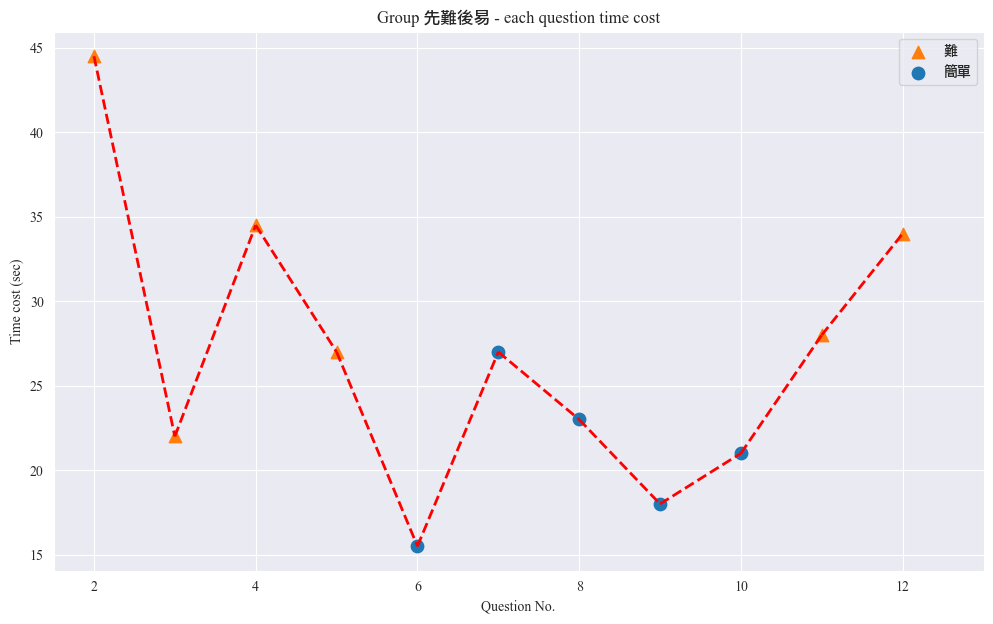

In [799]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

# 假資料（假設 qtime 已存在）
# qtime = [None, np.random.rand(12), np.random.rand(12), np.random.rand(12)]
# group_translate = {1: "A", 2: "B", 3: "C"}

marker_seqs = {
    1: ['^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '^', '^', '^'],
    2: ['^', 'o', 'o', 'o', 'o', '^', '^', '^', 'o', '^', '^', '^'],
    3: ['^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', '^', '^', '^']
}

line_color = 'red'  # 紅色線

for g, lis in zip([1, 2, 3], qtime[1:4]):
    x = np.arange(2, 2 + len(lis))
    y = lis

    fig, ax = plt.subplots(figsize=(12, 7))

    # 正確建立線段資料
    points = np.column_stack([x, y])
    segments = np.stack([points[:-1], points[1:]], axis=1)  # (n-1, 2, 2)
    lc = LineCollection(segments, colors=line_color, linewidths=2, linestyles='--')  # 紅色虛線
    ax.add_collection(lc)

    # 畫每個點
    scatter_handles = {}  # 用來避免重複圖例
    for xi, yi, m in zip(x, y, marker_seqs[g]):
        if m == 'o':
            color = 'C0'
            label = '簡單'
        elif m == '^':
            color = 'C1'
            label = '難'
        else:
            color = 'black'
            label = None

        sc = ax.scatter(xi, yi, marker=m, color=color, s=80,
                        label=label if label not in scatter_handles else None)
        if label and label not in scatter_handles:
            scatter_handles[label] = sc

    ax.set_title(f'Group {group_translate[g]} - each question time cost')
    ax.set_xlim([1.5, 13])
    ax.legend()
    ax.set_xlabel("Question No.")
    ax.set_ylabel("Time cost (sec)")
    plt.show()


Text(0, 0.5, 'Time cost (sec)')

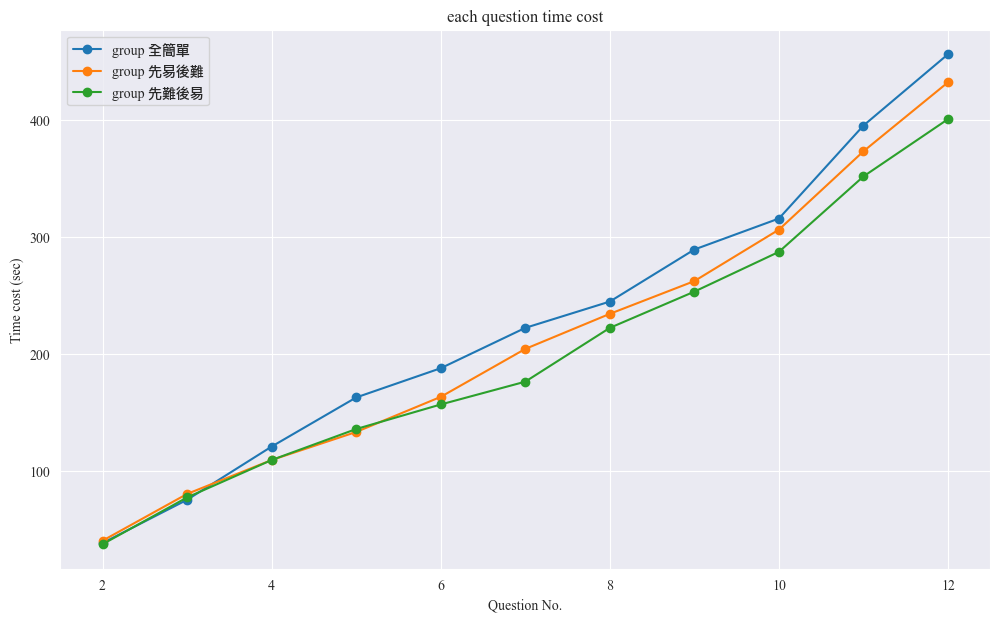

In [800]:
acctime = anstime_analyze(valid_experiment_data,groups = [0,1,2,3],col = 'accumulate_time',q_len=12)

# plot results
plt.figure(figsize=(12,7))
for g,lis in zip([1,2,3],acctime):
    plt.plot([i+2 for i in range(11)],lis,label = f'group {group_translate[g]}',marker = "o")
plt.title('each question time cost')
plt.legend()
plt.xlabel('Question No.')
plt.ylabel('Time cost (sec)')

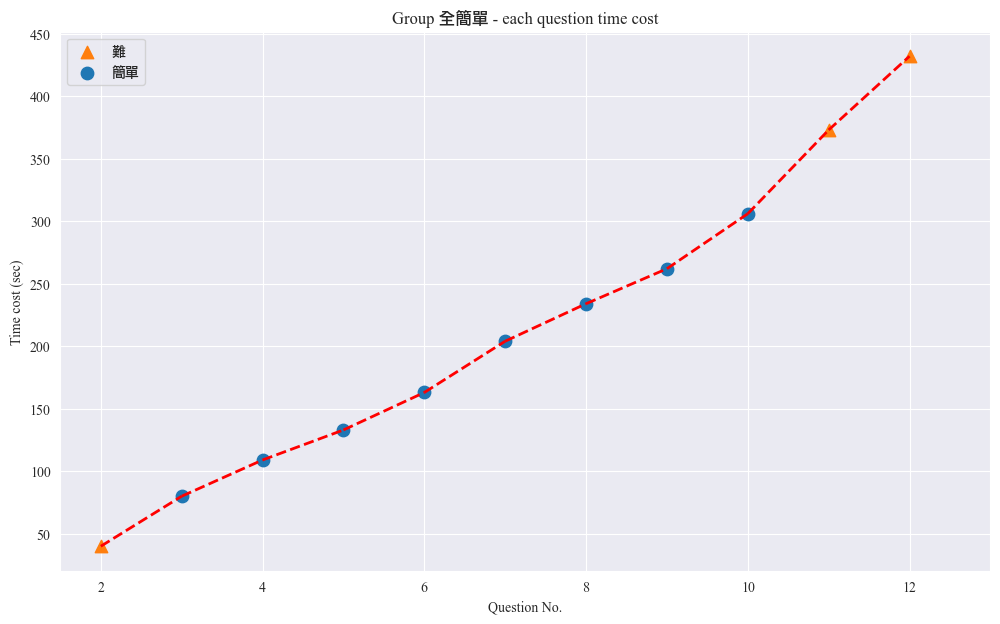

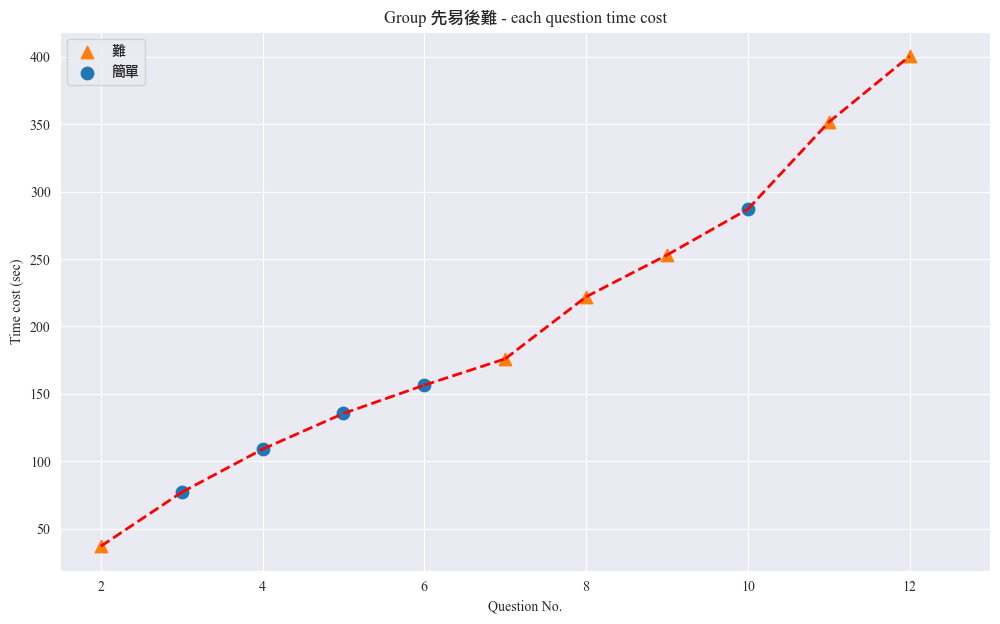

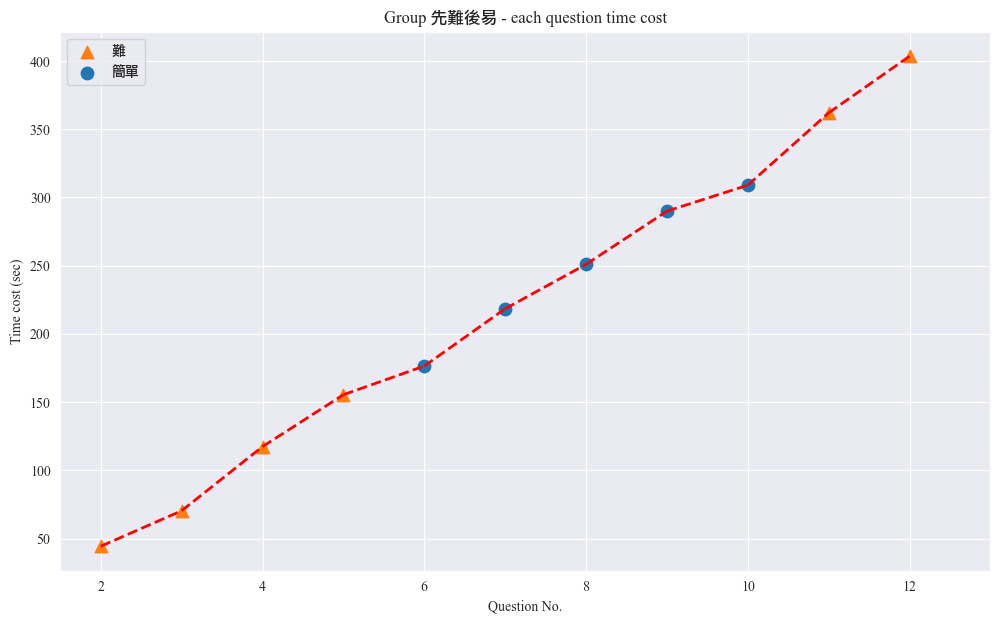

In [801]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

# 假資料（假設 qtime 已存在）
# qtime = [None, np.random.rand(12), np.random.rand(12), np.random.rand(12)]
# group_translate = {1: "A", 2: "B", 3: "C"}

marker_seqs = {
    1: ['^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '^', '^', '^'],
    2: ['^', 'o', 'o', 'o', 'o', '^', '^', '^', 'o', '^', '^', '^'],
    3: ['^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', '^', '^', '^']
}

line_color = 'red'  # 紅色線

for g, lis in zip([1, 2, 3], acctime[1:4]):
    x = np.arange(2, 2 + len(lis))
    y = lis

    fig, ax = plt.subplots(figsize=(12, 7))

    # 正確建立線段資料
    points = np.column_stack([x, y])
    segments = np.stack([points[:-1], points[1:]], axis=1)  # (n-1, 2, 2)
    lc = LineCollection(segments, colors=line_color, linewidths=2, linestyles='--')  # 紅色虛線
    ax.add_collection(lc)

    # 畫每個點
    scatter_handles = {}  # 用來避免重複圖例
    for xi, yi, m in zip(x, y, marker_seqs[g]):
        if m == 'o':
            color = 'C0'
            label = '簡單'
        elif m == '^':
            color = 'C1'
            label = '難'
        else:
            color = 'black'
            label = None

        sc = ax.scatter(xi, yi, marker=m, color=color, s=80,
                        label=label if label not in scatter_handles else None)
        if label and label not in scatter_handles:
            scatter_handles[label] = sc

    ax.set_title(f'Group {group_translate[g]} - each question time cost')
    ax.set_xlim([1.5, 13])
    ax.legend()
    ax.set_xlabel("Question No.")
    ax.set_ylabel("Time cost (sec)")
    plt.show()


In [802]:
# quntile regression on qtime 10,11,12
import statsmodels.formula.api as smf


for qn in [10,11,12]:
    data = {'time_cost' : valid_experiment_data['delta_time'].apply(lambda x: x[qn-2]), 'group': valid_experiment_data['experiment_mode']}
    mod = smf.quantreg(f'time_cost ~ C(group,Treatment(reference=1))',data = data)
    res = mod.fit(q = 0.5)
    print(f'\n\n\n----------------------------Q {qn}-------------------------\n\n\n')
    print(res.summary())




----------------------------Q 10-------------------------



                         QuantReg Regression Results                          
Dep. Variable:              time_cost   Pseudo R-squared:             0.005203
Model:                       QuantReg   Bandwidth:                       7.927
Method:                 Least Squares   Sparsity:                        22.83
Date:                Wed, 13 Aug 2025   No. Observations:                  315
Time:                        18:05:36   Df Residuals:                      311
                                        Df Model:                            3
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  18.0000      1.336     13.473      0.000      15.371      20.629
C(group, Treatment(reference=1))[T.0.0]     1.9733      1.8

In [803]:
data = {'time_cost' : valid_experiment_data['accumulate_time'].apply(lambda x: x[10]), 'group': valid_experiment_data['experiment_mode']}
mod = smf.quantreg(f'time_cost ~ C(group,Treatment(reference=1))',data = data)
res = mod.fit(q = 0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              time_cost   Pseudo R-squared:             0.006231
Model:                       QuantReg   Bandwidth:                       144.2
Method:                 Least Squares   Sparsity:                        516.8
Date:                Wed, 13 Aug 2025   No. Observations:                  315
Time:                        18:05:36   Df Residuals:                      311
                                        Df Model:                            3
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 432.0000     30.244     14.284      0.000     372.491     491.509
C(group, Treatment(reference=1))[T.0.0]    24.9580     41.347      0.604      0.547     -56.398     106.314
C(group, Treatm

In [804]:
valid_experiment_data.value_counts('experiment_mode')

experiment_mode
0.0    84
3.0    82
2.0    76
1.0    73
Name: count, dtype: int64

x# seq correct analyze

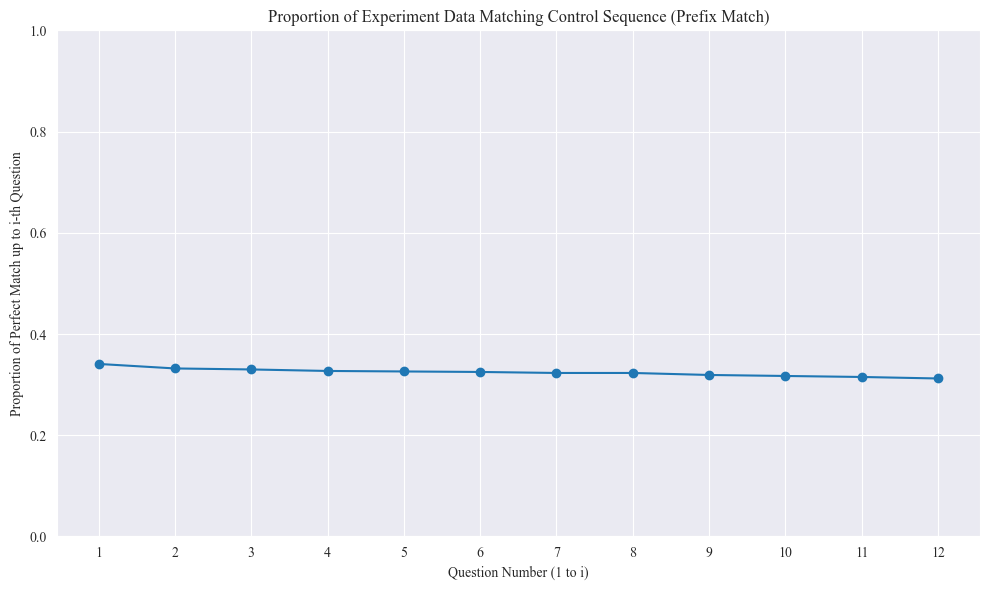

[np.float64(0.3409316154608523), np.float64(0.33201189296333), np.float64(0.33002973240832506), np.float64(0.3270564915758176), np.float64(0.3260654112983152), np.float64(0.3250743310208127), np.float64(0.32309217046580774), np.float64(0.32309217046580774), np.float64(0.3191278493557978), np.float64(0.31714568880079286), np.float64(0.3151635282457879), np.float64(0.3121902874132805)]


In [805]:
import matplotlib.pyplot as plt

# 確保有以下變數
# experiment_data: dataframe，含欄位 '12_question_id', 'search_key'
# seq_dict: dict，key 為 search_key，value 為正確的 sequence（長度 12 的 array）

# 儲存每一題符合比例
match_ratios = []

# 遍歷 1~12 題
for i in range(1, 13):
    def is_prefix_match(row):
        control_seq = seq_dict.get(row['search_key'])
        if control_seq is None:
            return False
        return np.array_equal(row['12_question_id'][:i], control_seq[:i])

    matched = experiment_data.apply(is_prefix_match, axis=1)
    ratio = matched.mean()  # 符合者比例
    match_ratios.append(ratio)

# 畫圖
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), match_ratios, marker='o', linestyle='-')
plt.xticks(range(1, 13))
plt.xlabel('Question Number (1 to i)')
plt.ylabel('Proportion of Perfect Match up to i-th Question')
plt.title('Proportion of Experiment Data Matching Control Sequence (Prefix Match)')
plt.grid(True)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
print(match_ratios)

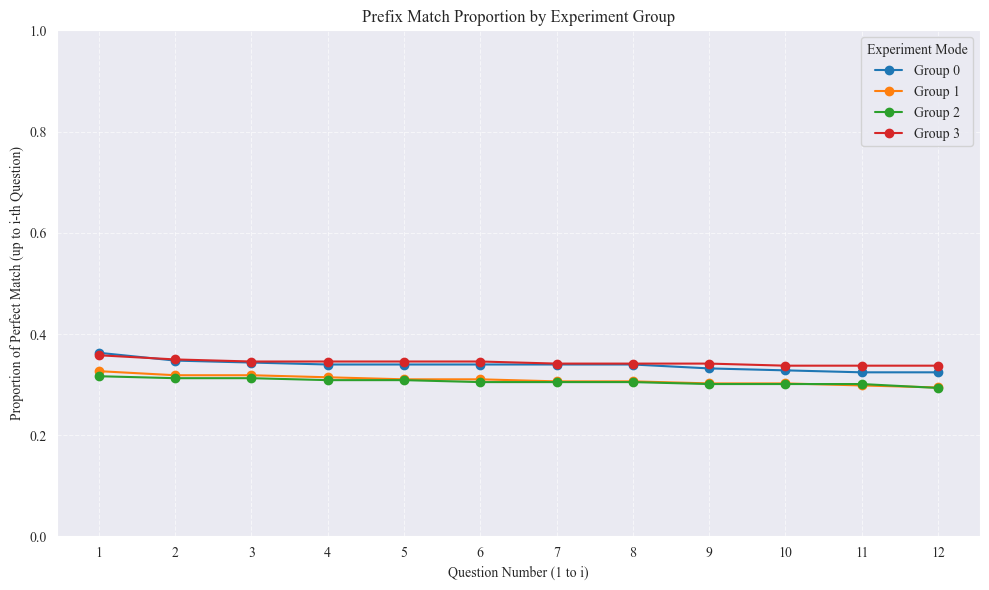

In [806]:
import matplotlib.pyplot as plt

# 取得實驗組別（排除 -1）
experiment_groups = experiment_data['experiment_mode'].unique()
experiment_groups = sorted([int(g) for g in experiment_groups if g != -1])

# 建立 dict 儲存每組比例序列
group_match_ratios = {g: [] for g in experiment_groups}

for i in range(1, 13):  # 題號 1~12
    for g in experiment_groups:
        df_g = experiment_data[experiment_data['experiment_mode'] == g]
        def is_prefix_match(row):
            control_seq = seq_dict.get(row['search_key'])
            if control_seq is None:
                return False
            return np.array_equal(row['12_question_id'][:i], control_seq[:i])
        matched = df_g.apply(is_prefix_match, axis=1)
        ratio = matched.mean()
        group_match_ratios[g].append(ratio)

# 畫圖
plt.figure(figsize=(10, 6))
x = range(1, 13)
for g in experiment_groups:
    plt.plot(x, group_match_ratios[g], marker='o', label=f'Group {g}')

plt.xticks(x)
plt.xlabel('Question Number (1 to i)')
plt.ylabel('Proportion of Perfect Match (up to i-th Question)')
plt.title('Prefix Match Proportion by Experiment Group')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1)
plt.legend(title='Experiment Mode')
plt.tight_layout()
plt.show()


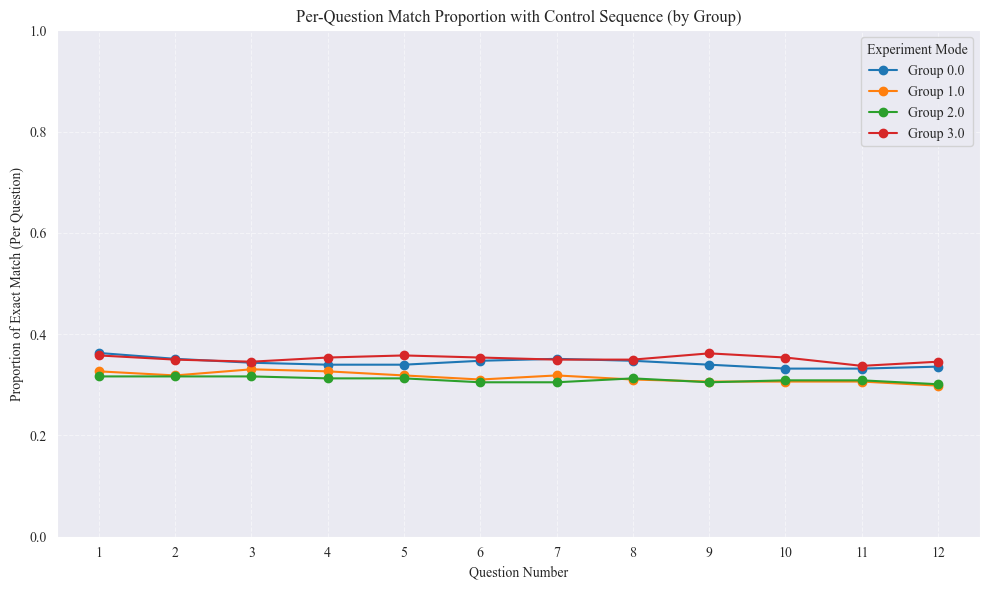

In [807]:
import matplotlib.pyplot as plt

# 設定組別（可依實際資料而定）
experiment_groups = sorted(experiment_data['experiment_mode'].dropna().unique())

# 儲存各組別在每一題的符合比例
group_question_match = {g: [] for g in experiment_groups}

# 對每一題 (0-indexed for Python)
for i in range(12):  # 題號 1~12
    for g in experiment_groups:
        df_g = experiment_data[experiment_data['experiment_mode'] == g]

        def is_q_match(row):
            control_seq = seq_dict.get(row['search_key'])
            if control_seq is None:
                return False
            return row['12_question_id'][i] == control_seq[i]

        matched = df_g.apply(is_q_match, axis=1)
        match_ratio = matched.mean()
        group_question_match[g].append(match_ratio)

# 畫圖
plt.figure(figsize=(10, 6))
x = list(range(1, 13))  # 題號

for g in experiment_groups:
    plt.plot(x, group_question_match[g], marker='o', label=f'Group {g}')

plt.xticks(x)
plt.xlabel('Question Number')
plt.ylabel('Proportion of Exact Match (Per Question)')
plt.title('Per-Question Match Proportion with Control Sequence (by Group)')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Experiment Mode')
plt.tight_layout()
plt.show()


In [808]:
print(experiment_data.count())
print(experiment_data.seq_valid.value_counts())

user_id             1009
session_id          1009
gamecharacter_id    1009
section_id          1009
difficulty_level    1009
is_correct          1009
question_id         1009
experiment_index    1009
experiment_mode     1009
create_time         1009
q_len               1009
create_at           1009
q_1                 1009
q_1_corr            1009
q_2                 1009
q_2_corr            1009
q_3                 1009
q_3_corr            1009
q_4                 1009
q_4_corr            1009
q_5                 1009
q_5_corr            1009
q_6                 1009
q_6_corr            1009
q_7                 1009
q_7_corr            1009
q_8                 1009
q_8_corr            1009
q_9                 1009
q_9_corr            1009
q_10                1009
q_10_corr           1009
q_11                1009
q_11_corr           1009
q_12                1009
q_12_corr           1009
q_1_mode            1009
q_2_mode            1009
q_3_mode            1009
q_4_mode            1009


In [809]:
exp_long = long_data[long_data['experiment_mode'].isin([0,1,2,3])]
non_exp_long = long_data[~long_data['experiment_mode'].isin([0,1,2,3])]

In [810]:
long_data[long_data['section_id'] == -9042528178512436726][['experiment_mode','question_id','create_time']]

,experiment_mode,question_id,create_time
2,1.0,"[4680614589130178593, -1794677401750382001, -1...","[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202..."
44,1.0,"[4680614589130178593, -1794677401750382001, -1...","[2025-04-29 18:55:30, 2025-04-29 18:56:22, 202..."
584,0.0,"[1201725490342244492, -8400046750455536008, -2...","[2025-03-27 08:42:34, 2025-03-27 08:42:53, 202..."
756,-1.0,"[7456255943837706190, -7934014245957245064, 22...","[2025-04-07 11:55:41, 2025-04-07 11:55:59, 202..."
1026,3.0,"[4680614589130178593, -1794677401750382001, -6...","[2025-04-13 20:48:21, 2025-04-13 20:49:37, 202..."
...,...,...,...
81800,-1.0,"[-1113156898056861262, -3678348170036989128, -...","[2025-03-24 10:37:27, 2025-03-24 10:37:45, 202..."
81904,1.0,"[1201725490342244492, -7934014245957245064, -1...","[2025-03-25 15:53:19, 2025-03-25 15:54:53, 202..."
83336,3.0,"[4680614589130178593, -1794677401750382001, -6...","[2025-04-15 21:05:09, 2025-04-15 21:06:03, 202..."
83639,2.0,"[1637307589124347792, 8231509399365486276, 468...","[2025-04-29 15:48:04, 2025-04-29 15:49:04, 202..."


In [811]:
control_seqs

,Unnamed: 0,sequence,publisher,section_name,book_volume_name,publisher_name_113_2,section_name_113_2,book_volume_name_113_2,Q1,Q2,...,Q7,Q8,Q9,Q10,Q11,Q12,section_id,experiment_mode,search_key,control_seq
0,0,control,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-1908360932417219092,-2348804092072956357,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,0,-3545039493898610459_0,"[69113588992878618, -75308616834142435, -53711..."
1,1,treatment1,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,4334620487126035177,5108527915460688310,-1288720951380365417,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,1,-3545039493898610459_1,"[69113588992878618, -75308616834142435, -23488..."
2,2,treatment2,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-3202230148646485972,-1908360932417219092,-8594155001789108421,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,2,-3545039493898610459_2,"[69113588992878618, -75308616834142435, -23488..."
3,3,treatment3,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-2348804092072956357,-5371107019222777434,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,3,-3545039493898610459_3,"[69113588992878618, -75308616834142435, -32022..."
4,0,control,康軒國小,9 時間的乘除,五下112,康軒國小,9 時間的乘除,五下113,520497830035904533,-2091250926218676150,...,-2307309825203258326,-4398838213214723618,4054464459422027015,2596504183669148612,3305360628776648069,-2670908083034426001,-3525338262485141936,0,-3525338262485141936_0,"[520497830035904533, -2091250926218676150, 174..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3,treatment3,康軒國小,5 十進位結構,五下112,康軒國小,5 十進位結構,五下113,4680614589130178593,-1794677401750382001,...,-1113156898056861262,3847776141460785270,-3678348170036989128,1637307589124347792,5581172194395314614,8231509399365486276,-9042528178512436726,3,-9042528178512436726_3,"[4680614589130178593, -1794677401750382001, -6..."
60,0,control,康軒國小,1 體積,五下112,康軒國小,1 體積,五下113,5986642740406154097,-1814475752912975980,...,4816520945223989067,7246391716930387719,5709007776101919275,8707461698589525409,831253084160088526,-5263639425820740356,-247801341597882458,0,-247801341597882458_0,"[5986642740406154097, -1814475752912975980, 57..."
61,1,treatment1,康軒國小,1 體積,五下112,康軒國小,1 體積,五下113,5986642740406154097,-1814475752912975980,...,-9013829383219240211,5556066601331488933,-3286862775113972652,8707461698589525409,831253084160088526,-5263639425820740356,-247801341597882458,1,-247801341597882458_1,"[5986642740406154097, -1814475752912975980, 57..."
62,2,treatment2,康軒國小,1 體積,五下112,康軒國小,1 體積,五下113,5986642740406154097,-1814475752912975980,...,4816520945223989067,-1025311054463154271,7479955377401805758,8707461698589525409,831253084160088526,-5263639425820740356,-247801341597882458,2,-247801341597882458_2,"[5986642740406154097, -1814475752912975980, 57..."
